## Лабораторная работа № 3: Визуализация данных
Выполнил: Русин Ярослав, гр. № 6135

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")
import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


# 0. Загрузка датасета

<br>Данные <br>


Атрибуты:

- Name = Название фильма
- Year - Год, когда этот фильм был выпущен.
- Runtime - общее время просмотра фильма.
- Genre - Жанр фильма
- Rating - Рейтинг фильма на сайте IMDB
- Timeline - мини-рассказ / резюме
- Meta_score - Оценка фильма пользователями
- Votes - Общее количество голосов
- Gross - Деньги, заработанные этим фильмом.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip  /content/drive/MyDrive/Datasets/IMDb_ratings.zip -d data

Archive:  /content/drive/MyDrive/Datasets/IMDb_ratings.zip
  inflating: data/IMDB_movie_reviews_details.csv  


In [5]:
imdb_data = pd.read_csv('data/IMDB_movie_reviews_details.csv')
imdb_data.head(10)

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
5,5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarria...,"706,079",$4.36M
6,6,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"1,672,460",$377.85M
7,7,Pulp Fiction,1994,154,"Crime, Drama",8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...","1,862,472",$107.93M
8,8,Schindler's List,1993,195,"Biography, Drama, History",8.9,94.0,"In German-occupied Poland during World War II,...","1,236,213",$96.90M
9,9,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,"2,113,984",$292.58M


# 1. Matplotlib

- Построить любой график (любого рода) с помощью чистого matplotlib / pylab
- Построить несколько суб-графиков на одном графике используя .subplot.


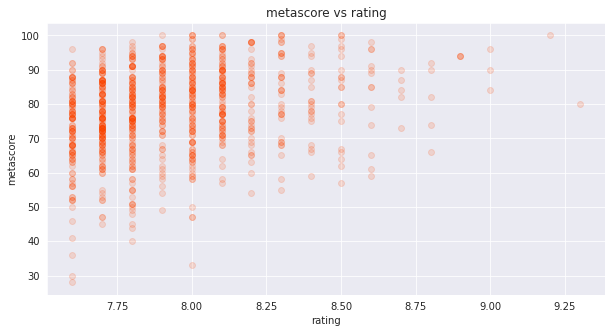

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(imdb_data.rating, 
           imdb_data.metascore,
           color='#FF4500',
           alpha=0.15)
ax.set(title='metascore vs rating', xlabel='rating', ylabel='metascore')
plt.show()

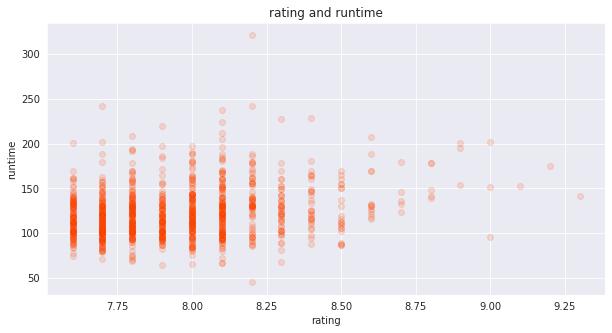

In [7]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(imdb_data.rating, 
           imdb_data.runtime,
           color='#FF4500',
           alpha=0.15
        )
ax.set(title='rating and runtime', xlabel='rating', ylabel='runtime')
plt.show()

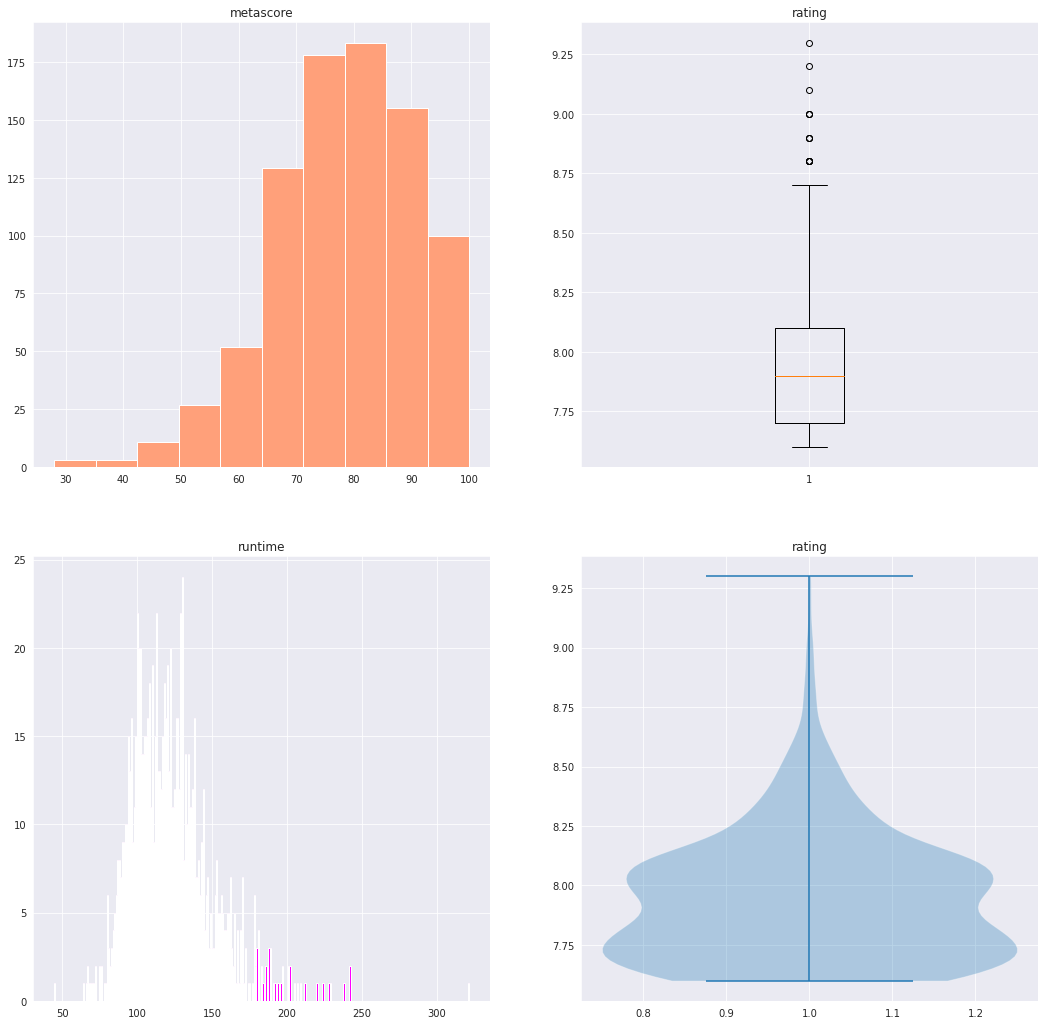

In [8]:
fig, ax = plt.subplots(2,2, figsize=(18, 18))

ax[0,0].hist(imdb_data.metascore, color="#ffa07a")
ax[0,0].set(title = "metascore")

ax[0, 1].boxplot(imdb_data.rating)
ax[0, 1].set(title ="rating")

ax[1,0].bar(imdb_data.runtime.value_counts().index, imdb_data.runtime.value_counts().values, color="#ff00ff")
ax[1,0].set(title ="runtime")

ax[1, 1].violinplot(imdb_data.rating)
ax[1, 1].set(title ="rating")

plt.show()

# 2. На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot

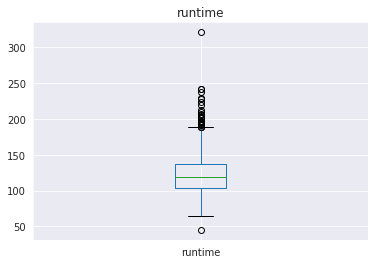

In [9]:
imdb_data.runtime.plot.box(by=[['rating', 'metascore']], title='runtime')
plt.show()

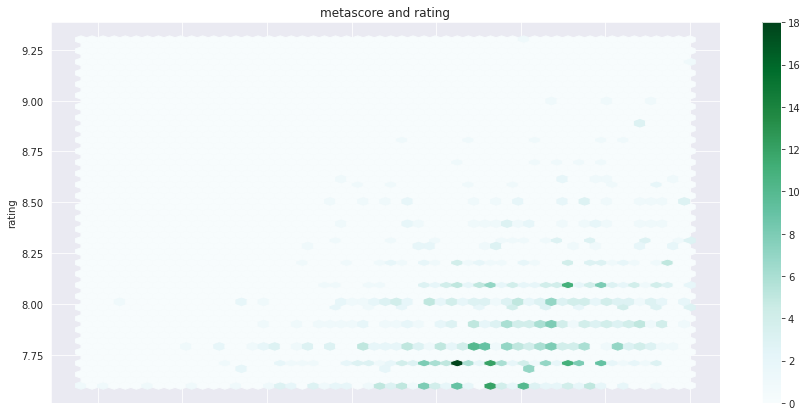

In [10]:
imdb_data.plot.hexbin(x='metascore', 
                         y="rating", 
                         gridsize=55,
                         title='metascore and rating',
                         figsize=(15, 7),
                         reduce_C_function=np.max,
                         )
plt.show()

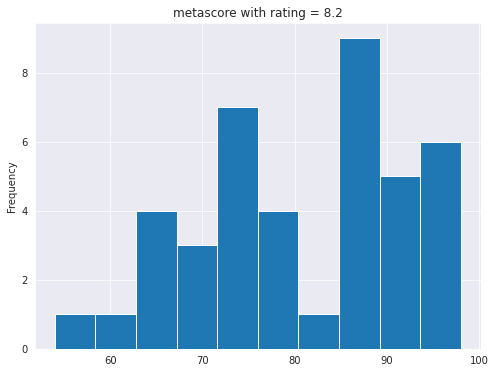

In [11]:
imdb_data.loc[imdb_data.rating == 8.2].metascore.plot.hist(figsize=(8, 6),
                                                         title='metascore with rating = 8.2')
plt.show()

# 3. Seaborn

- Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных
- Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных
- Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального
- Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика!)

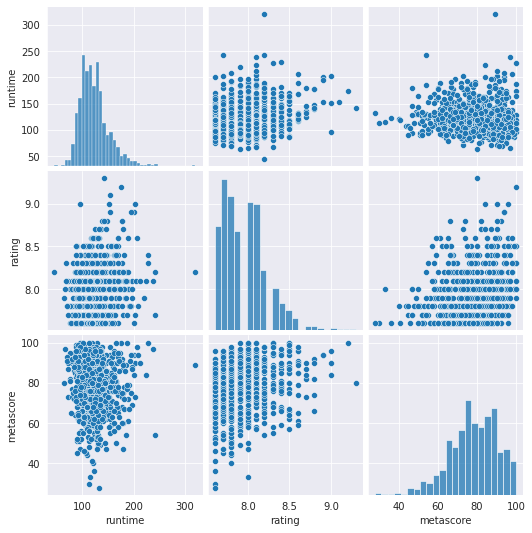

In [12]:
sns.pairplot(imdb_data[['runtime', 'rating', 'metascore']])
plt.show()

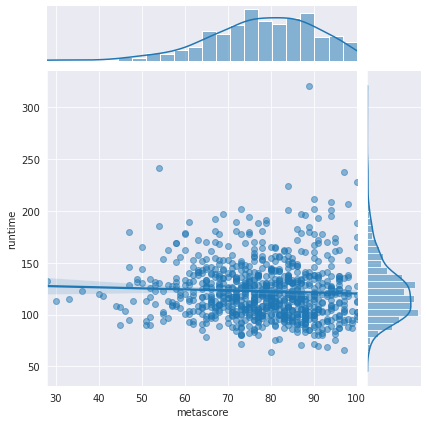

In [13]:
sns.jointplot(data=imdb_data, 
              x="metascore", 
              y="runtime", 
              kind="reg",
              joint_kws = {'scatter_kws':dict(alpha=0.5)})
plt.show()

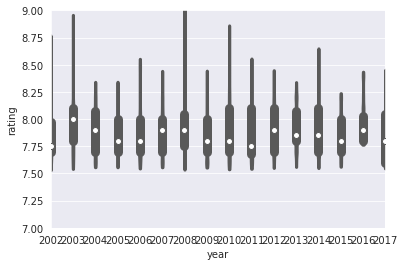

In [14]:
imdb_data = imdb_data.sort_values(by=['year'])
imdb_data.head(2)
sns.violinplot(data=imdb_data, 
               palette="Set2", 
               x='year',
               y='rating',
               bw=0.2, 
               cut=1, 
               linewidth=3).set(xlim=(80, 95),ylim=(7,9))
plt.show()

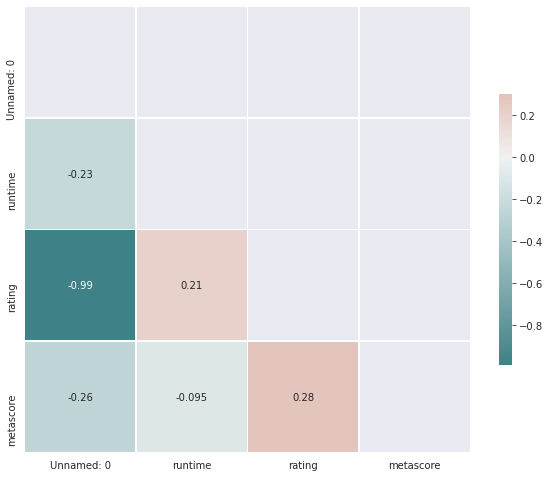

In [15]:
corr = imdb_data.drop(['name', 'genre', 'gross'], axis=1).corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

# 4. Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


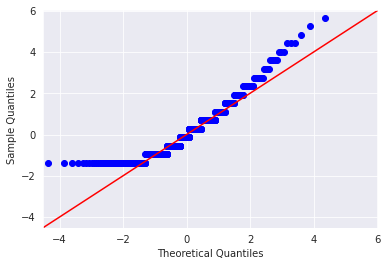

In [16]:
import statsmodels.api as sm
from scipy import stats

fig = sm.qqplot(imdb_data['rating'], stats.t, fit=True, line="45")

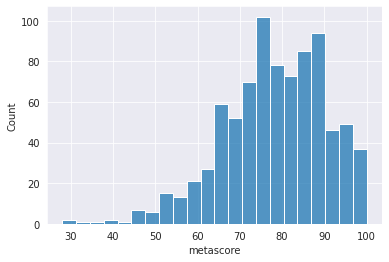

In [17]:
sns.histplot(imdb_data['metascore'])
plt.show()

# 5.Построить любой график (связанный с вашими данными!) с помощью plotly

In [ ]:
! pip install plotly --upgrade

In [19]:
import plotly.express as px 
imdb_data = pd.read_csv('data/IMDB_movie_reviews_details.csv')
top10_films = imdb_data.nlargest(10, 'metascore')
fig = px.bar(top10_films, x='metascore', y=['rating'], barmode='group')
fig.show()